# MANE 4962 HW 1
    Lucas Zhou  
    662005044

Problem 1:

In [1]:
import numpy as np

x1 = np.array([2, 3, 4, 8, 9])
x2 = np.array([2, -3, -4, 89])

features_x1 = len(x1)
features_x2 = len(x2)

print('features_x1=', features_x1)
print('features_x2=', features_x2)

features_x1= 5
features_x2= 4


In [2]:
norm1_x1 = np.linalg.norm(x1, 1)
norm2_x1 = np.linalg.norm(x1, 2)
norm_inf_x1 = np.linalg.norm(x1, np.inf)

norm1_x2 = np.linalg.norm(x2, 1)
norm2_x2 = np.linalg.norm(x2, 2)
norm_inf_x2 = np.linalg.norm(x2, np.inf)

print("norm1_x1:",norm1_x1)
print("norm2_x1:", norm2_x1)
print("norm_inf_x1:", norm_inf_x1)
print("norm1-x2:",norm1_x2)
print("norm2-x2:",norm2_x2)
print("norm_inf_x2:", norm_inf_x2)

norm1_x1: 26.0
norm2_x1: 13.19090595827292
norm_inf_x1: 9.0
norm1-x2: 98.0
norm2-x2: 89.16277250063504
norm_inf_x2: 89.0


Problem 2:

Assuming the input and output image are RGB, each has 3 channels.

In [3]:
feature_dimensions = (1024, 1024, 3)
output_dimensions = (64, 64, 3)
length_feature = np.prod(feature_dimensions)
length_output = np.prod(output_dimensions)

(a) The length of the feature vector

In [4]:
length_feature

3145728

(b) The length of the output vector

In [5]:
length_output

12288

(c) Number of elements in matrix W

In [6]:
W = 3145728 * 12288

In [7]:
W

38654705664

Number of elements in matrix b

In [8]:
print('elements of b:', length_output)

elements of b: 12288


Problem 3:

In [9]:
matrix = np.array([[1, 2], [-1, 0]]) 
norm1 = np.linalg.norm(matrix, 1)
norm2 = np.linalg.norm(matrix, 2)
norm_inf = np.linalg.norm(matrix, np.inf)
frobenius_norm = np.linalg.norm(matrix, 'fro')

1-norm of W

In [10]:
norm1

2.0

2-norm of W

In [11]:
norm2

2.2882456112707366

infinite norm of W

In [12]:
norm_inf

3.0

Frobenius norm of W

In [13]:
frobenius_norm

2.449489742783178

Problem 4:

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

X = iris.data[:, :3] # only selecting first three features
y = iris.target

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.9333333333333333


Problem 5:

In [15]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *

#Load dataset
#split into input (X) and output (y)
X = np.array([[1], [5], [10], [15], [20], [40], [50], [65], [80], [100]])
X = X*1.0
y = np.array([[1**(1/7)], [5**(1/7)], [10**(1/7)], [15**(1/7)], [20**(1/7)], [40**(1/7)], [50**(1/7)], [65**(1/7)], [80**(1/7)], [100**(1/7)]])

y = y*1.0

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' % (X[i].tolist(), predictions[i][0], y[i][0]))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 85ms/step
[1.0] => 1.04 (expected 1.00)
[5.0] => 1.24 (expected 1.26)
[10.0] => 1.46 (expected 1.39)
[15.0] => 1.49 (expected 1.47)
[20.0] => 1.52 (

4/4 [==============================] - 0s 2ms/step


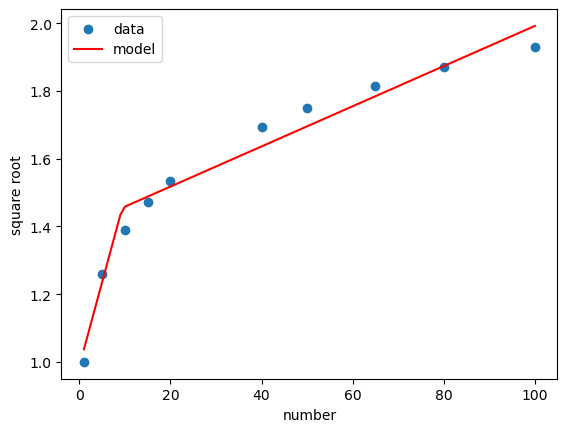

In [16]:
import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('number')
plt.ylabel('square root')
plt.legend()

Problem 6:

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

X = iris.data[:, :1] #only sepal length 
y = iris.data[:,2:3] #only petal length

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True)

In [18]:
#define keras model
model = Sequential()

model.add(Dense(40,input_dim=1,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)
print('tarining')
#fit the keras model on the dataset (CPU)
model.fit(X_train,y_train,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X_test)

print('predictions')
for i in range(len(y_test)):
    print('%s => %.2f (expected %.2f)' % (X_test[i].tolist(), predictions[i][0], y_test[i][0]))

tarining
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                80        
                                                                 
 dense_5 (Dense)             (None, 40)                1640      
                                                                 
 dense_6 (Dense)             (None, 40)                1640      
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3,401
Trainable params: 3,401
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 4ms/step
predictions
[6.3] => 4.80 (expected 4.90)
[6.8] => 5.34 (expected 5.50)
[6.4] => 4.91 (expected 5.60)
[5.6] => 3.40 (expecte

1/1 [==============================] - 0s 18ms/step


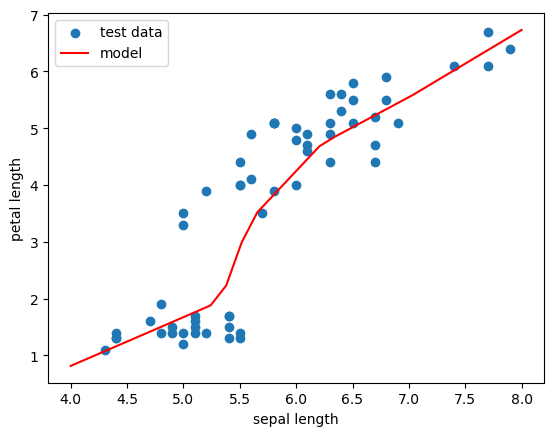

In [19]:
import matplotlib.pyplot as plt
number_grid = np.linspace(4, 8, 30)
plt.scatter(X_test,y_test, label='test data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()